In [1]:
import numpy as np
import pandas as pd
import Acceleration as Ace
import scvelo as scv
import MyCodePloting as mc
import MyCodeTools as mt
scv.logging.print_version()

Running scvelo 0.2.5 (python 3.10.2) on 2023-05-06 13:15.


In [2]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

In [3]:
adata = scv.datasets.pancreas()
adata

AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

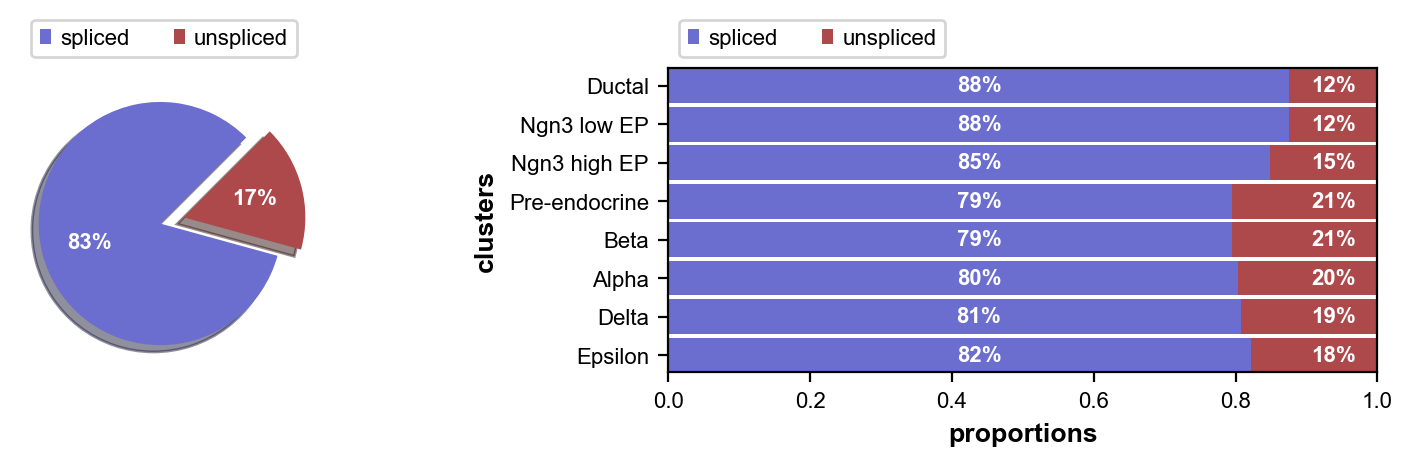

In [4]:
scv.pl.proportions(adata)

In [5]:
scv.pp.filter_genes(adata, min_shared_counts=20)
scv.pp.normalize_per_cell(adata)
scv.pp.filter_genes_dispersion(adata, n_top_genes=2000)
scv.pp.log1p(adata)

Filtered out 20801 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.


In [6]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Filtered out 55 genes that are detected 20 counts (shared).
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
computing neighbors
    finished (0:01:19) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [7]:
Spliced = adata.to_df(layer='Ms')
Unspliced = adata.to_df(layer='Mu')

In [8]:
scv.tl.recover_dynamics(adata)
scv.tl.velocity(adata, mode='dynamical')

recovering dynamics (using 1/8 cores)


  0%|          | 0/1273 [00:00<?, ?gene/s]

    finished (0:27:43) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:08) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


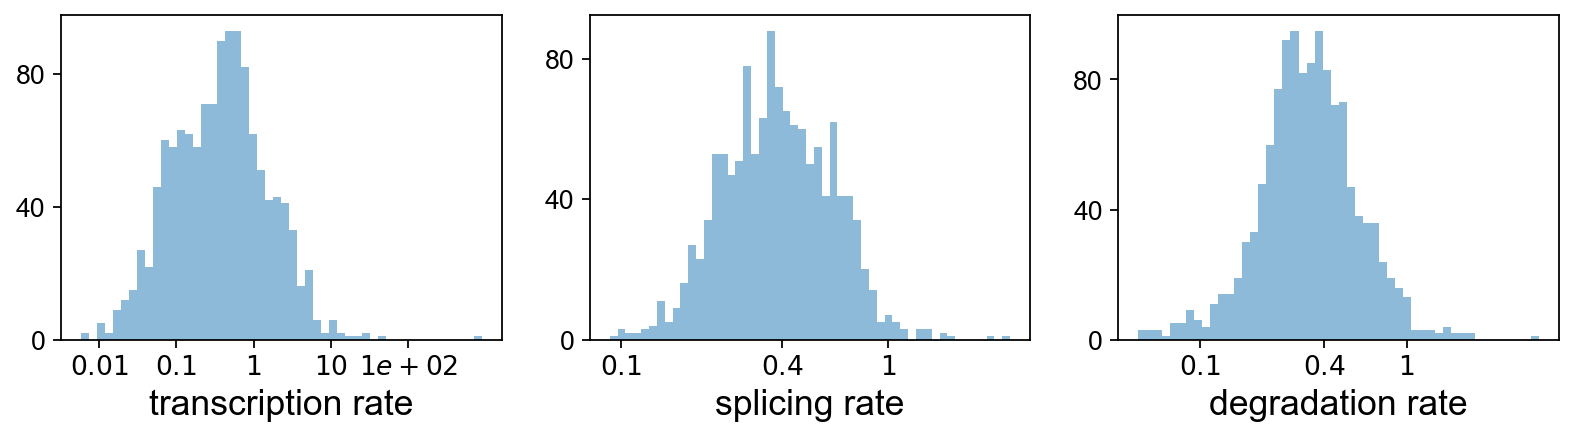

In [35]:
df = adata.var
#df = df[(df['fit_likelihood'] > .1) & df['velocity_genes'] == True]

kwargs = dict(xscale='log', fontsize=16)
with scv.GridSpec(ncols=3) as pl:
    pl.hist(df['fit_alpha'], xlabel='transcription rate', **kwargs)
    pl.hist(df['fit_beta'] * df['fit_scaling'], xlabel='splicing rate', xticks=[.1, .4, 1], **kwargs)
    pl.hist(df['fit_gamma'], xlabel='degradation rate', xticks=[.1, .4, 1], **kwargs)

df1 = scv.get_df(adata, 'fit*', dropna=True)

In [37]:
adata

AnnData object with n_obs × n_vars = 3696 × 1945
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'acc_self_transition', 'root_cells', 'end_points', 'acc_pseudotime'
    var: 'highly_variable_genes', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca', 'recover_dynamics', 'velocity_params', 'acc_graph', 'acc_graph_neg', 'acc_params', 'paga', 'clusters_sizes'
    obsm: 'X_pca', 'X_umap', 'acc_umap'
    varm: 'loss'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'fit_t', 'fit_tau', 'fit_tau_', 'velocity', 'velocity_u', 'acc'
    obsp: 'dis

In [39]:
len(adata.layers['velocity'])

3696

In [40]:
len(adata.layers['Mu'])

3696

In [44]:
pd.DataFrame(adata.layers['velocity'])

0     1     2     3     4     5         6         7     8     \
0     0.00e+00 -0.06   NaN  0.15   NaN -0.01  9.16e-03  2.41e-02   NaN   
1     4.11e-04 -0.02   NaN -0.04   NaN -0.35  4.96e-02  1.73e-04   NaN   
2     4.35e-04  0.11   NaN  0.02   NaN -0.00 -2.03e-02 -1.39e-02   NaN   
3     1.47e-03  0.12   NaN  0.14   NaN -0.44  3.52e-02  6.61e-05   NaN   
4     2.15e-04 -0.07   NaN -0.04   NaN -0.07  4.16e-02  2.49e-02   NaN   
...        ...   ...   ...   ...   ...   ...       ...       ...   ...   
3691  0.00e+00 -0.07   NaN  0.02   NaN -0.03  6.59e-03  1.56e-02   NaN   
3692  8.09e-04 -0.07   NaN -0.02   NaN -0.22  4.16e-02  2.38e-02   NaN   
3693  3.21e-04 -0.03   NaN -0.05   NaN -0.14  3.77e-02  1.16e-04   NaN   
3694  7.48e-04  0.12   NaN -0.00   NaN  0.24  4.70e-02 -0.00e+00   NaN   
3695  2.75e-04 -0.06   NaN  0.04   NaN -0.02  5.02e-02 -0.00e+00   NaN   

          9     ...  1935      1936      1937  1938  1939  1940  1941  1942  \
0     2.46e-02  ...  0.02 -1.01e-01 -1.56e-01 -0.21  0.10  1.43   NaN   NaN   
1     2.80e-02  ...  0.03  3.79e-03  1.30e-01 -0.18  0.00  0.13   NaN   NaN   
2     1.71e-02  ...  0.03 -7.81e-02  5.37e-02 -0.21  0.09  0.70   NaN   NaN   
3     5.16e-03  ...  0.04  5.86e-03 -0.00e+00  0.07  0.10  0.17   NaN   NaN   
4     3.61e-02  ...  0.02 -9.85e-02 -0.00e+00 -0.20  0.10  0.00   NaN   NaN   
...        ...  ...   ...       ...       ...   ...   ...   ...   ...   ...   
3691  3.09e-02  ...  0.02 -8.34e-02 -1.39e-01 -0.25  0.10  0.44   NaN   NaN   
3692  1.95e-02  ...  0.04  1.07e-01 -7.91e-03 -0.24  0.03  0.00   NaN   NaN   
3693  3.67e-02  ...  0.02  1.21e-01  0.00e+00  0.13  0.01  0.06   NaN   NaN   
3694  3.58e-02  ...  0.04 -1.10e-01  2.24e-02 -0.25  0.07 -0.37   NaN   NaN   
3695  2.81e-02  ...  0.03 -8.50e-02 -1.16e-01 -0.26  0.02  1.09   NaN   NaN   

      1943  1944  
0     0.08   NaN  
1     0.07   NaN  
2     0.08   NaN  
3     0.08   NaN  
4     0.05   NaN  
...    ...   ...  
3691  0.06   NaN  
3692  0.07   NaN  
3693  0.05   NaN  
3694  0.09   NaN  
3695  0.09   NaN  

[3696 rows x 1945 columns]

In [46]:
scv.tl.velocity_graph(adata)

computing velocity graph (using 1/8 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:09) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


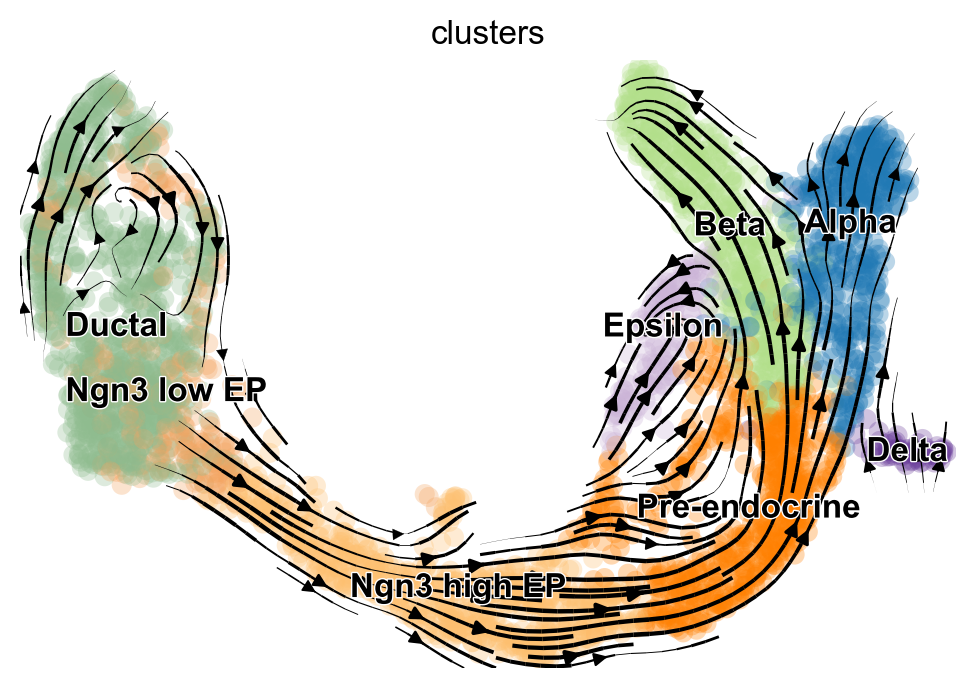

In [47]:
scv.pl.velocity_embedding_stream(adata, basis='umap')

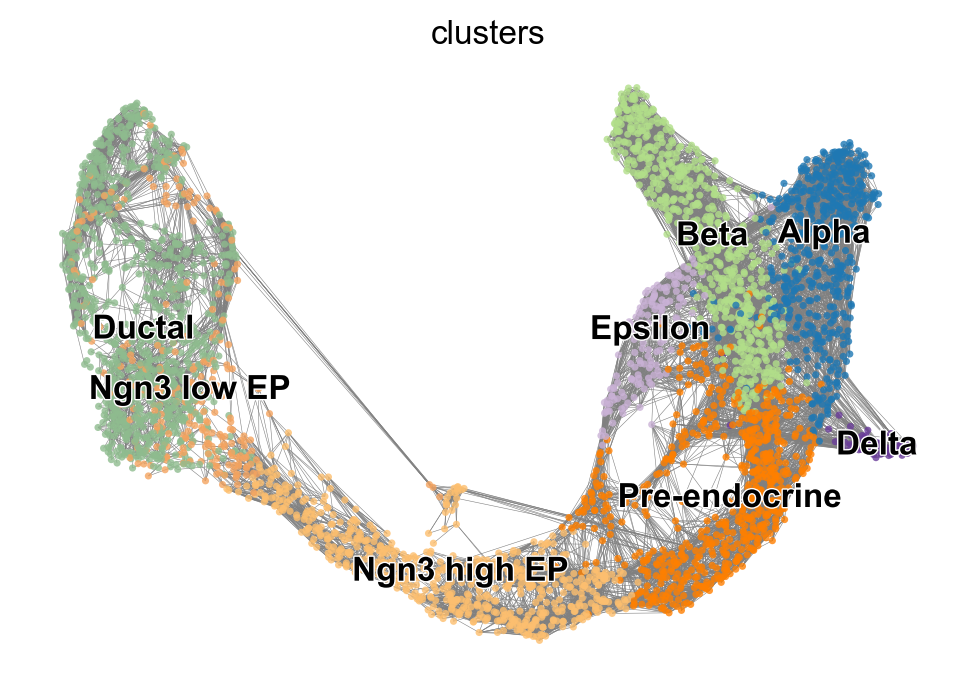

In [48]:
scv.pl.velocity_graph(adata, threshold=.1)

In [49]:
# this is needed due to a current bug - bugfix is coming soon.
adata.uns['neighbors']['distances'] = adata.obsp['distances']
adata.uns['neighbors']['connectivities'] = adata.obsp['connectivities']

scv.tl.paga(adata, groups='clusters')
df = scv.get_df(adata, 'paga/transitions_confidence', precision=2).T
df.style.background_gradient(cmap='Blues').format('{:.2g}')


running PAGA using priors: ['velocity_pseudotime']
    finished (0:00:01) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


C:\Users\Pradip\AppData\Roaming\Python\Python310\site-packages\networkx\convert.py:158: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `from_scipy_sparse_array` instead.
  return nx.from_scipy_sparse_matrix(data, create_using=create_using)


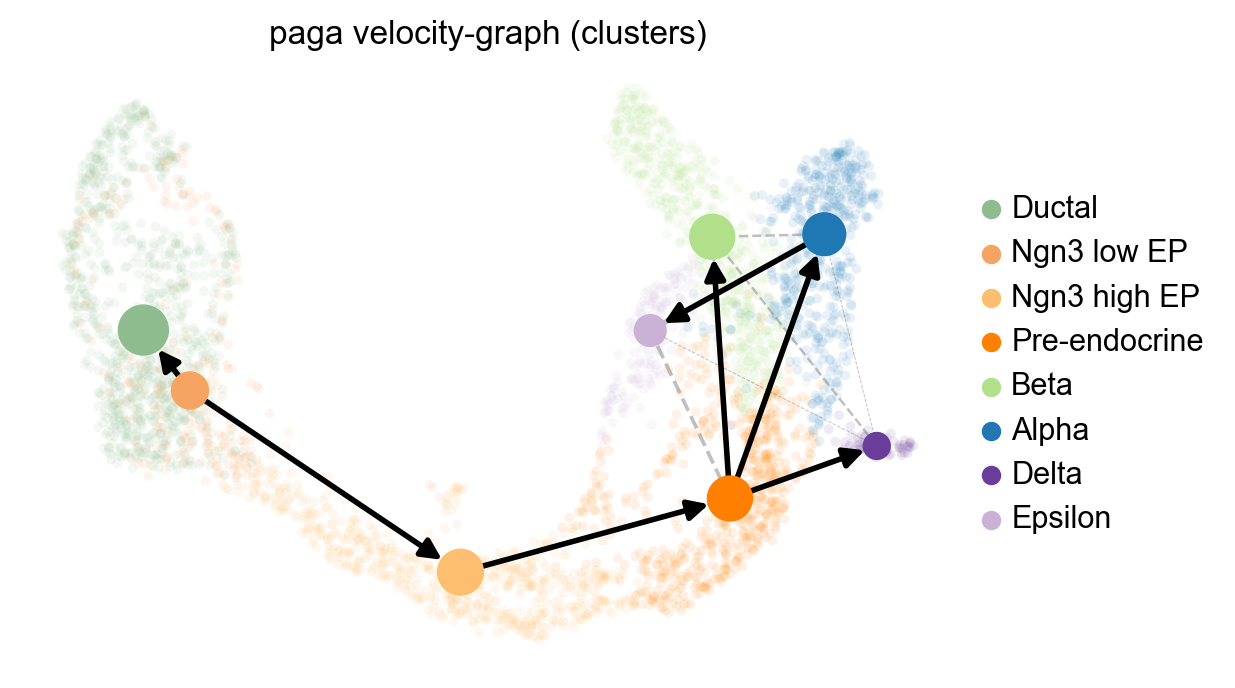

In [50]:
scv.pl.paga(adata, basis='umap', size=50, alpha=.1,
            min_edge_width=2, node_size_scale=1.5)

In [19]:
#gamma = adata.var['velocity_gamma']
acc = adata.var['fit_alpha'] - (adata.var['fit_beta']+adata.var['fit_gamma'])*Unspliced + (adata.var['fit_gamma']**2)*Spliced   # Mu - (1+gamma)*Mu + (gamma**2)*Ms
acc

index                Sntg1     Snhg6  Ncoa2    Sbspon  Ube2w      Mcm3  \
index                                                                    
AAACCTGAGAGGGATA  0.011402  0.300985    NaN  0.464865    NaN  3.103043   
AAACCTGAGCCTTGAT  0.010195  0.330697    NaN  0.408213    NaN  2.507582   
AAACCTGAGGCAATTA  0.010186  0.307989    NaN  0.464865    NaN  3.096367   
AAACCTGCATCATCCC -0.003014  0.163702    NaN  0.184361    NaN  3.788274   
AAACCTGGTAAGTGGC  0.015726  0.226128    NaN  0.470130    NaN  3.196396   
...                    ...       ...    ...       ...    ...       ...   
TTTGTCAAGTGACATA  0.008193  0.285865    NaN  0.399730    NaN  3.137822   
TTTGTCAAGTGTGGCA -0.002466  0.357462    NaN  0.467246    NaN  3.440363   
TTTGTCAGTTGTTTGG  0.012944  0.437926    NaN  0.103513    NaN  3.298528   
TTTGTCATCGAATGCT  0.000098  0.403199    NaN  0.464865    NaN  2.509559   
TTTGTCATCTGTTTGT  0.009588  0.411279    NaN  0.388705    NaN  3.105893   

index              Fam135a    Adgrb3  Tmem131    Tbc1d8  ...   Sh3kbp1  \
index                                                    ...             
AAACCTGAGAGGGATA  0.009691 -0.131898      NaN  0.031055  ... -0.022587   
AAACCTGAGCCTTGAT  0.052040  0.046828      NaN  0.061679  ...  0.053749   
AAACCTGAGGCAATTA  0.053451 -0.090278      NaN  0.033429  ... -0.027933   
AAACCTGCATCATCCC  0.080998  0.046828      NaN  0.074068  ...  0.035555   
AAACCTGGTAAGTGGC -0.183092 -1.488302      NaN -0.062311  ... -0.137344   
...                    ...       ...      ...       ...  ...       ...   
TTTGTCAAGTGACATA -0.053969 -0.328351      NaN  0.027766  ... -0.108400   
TTTGTCAAGTGTGGCA -0.243878 -0.908330      NaN -0.157485  ... -0.073395   
TTTGTCAGTTGTTTGG  0.016756  0.046828      NaN  0.073851  ...  0.093155   
TTTGTCATCGAATGCT -0.022753 -0.091131      NaN  0.044448  ... -0.041364   
TTTGTCATCTGTTTGT  0.060391  0.019560      NaN  0.061079  ...  0.032123   

index              Map3k15      Rai2     Rbbp7     Ap1s2    Tmem27  Uty  \
index                                                                     
AAACCTGAGAGGGATA  0.175386  0.651702  1.263647  0.093873  3.673630  NaN   
AAACCTGAGCCTTGAT  0.252467  0.792172  0.909200  0.202643  3.663664  NaN   
AAACCTGAGGCAATTA  0.198760  0.267367  1.485125  0.009534  1.337723  NaN   
AAACCTGCATCATCCC  0.224840  0.792172  0.185915  0.202643  3.955835  NaN   
AAACCTGGTAAGTGGC  0.031482  0.792172  1.528045  0.202643  3.954723  NaN   
...                    ...       ...       ...       ...       ...  ...   
TTTGTCAAGTGACATA  0.173132  0.704784  1.185240  0.132271  3.399451  NaN   
TTTGTCAAGTGTGGCA -0.232136  0.802431  1.207620  0.146948  3.956363  NaN   
TTTGTCAGTTGTTTGG  0.252467  0.792172 -0.387598  0.202643  3.956247  NaN   
TTTGTCATCGAATGCT  0.111434  0.411239  1.448368 -0.125700  0.404383  NaN   
TTTGTCATCTGTTTGT  0.168898  0.677389  1.362590 -0.047393  2.731011  NaN   

index             Ddx3y   Eif2s3y  Erdr1  
index                                     
AAACCTGAGAGGGATA    NaN -0.023977    NaN  
AAACCTGAGCCTTGAT    NaN  0.045085    NaN  
AAACCTGAGGCAATTA    NaN  0.145722    NaN  
AAACCTGCATCATCCC    NaN  0.106628    NaN  
AAACCTGGTAAGTGGC    NaN  0.091435    NaN  
...                 ...       ...    ...  
TTTGTCAAGTGACATA    NaN  0.082942    NaN  
TTTGTCAAGTGTGGCA    NaN  0.179157    NaN  
TTTGTCAGTTGTTTGG    NaN  0.138143    NaN  
TTTGTCATCGAATGCT    NaN  0.011326    NaN  
TTTGTCATCTGTTTGT    NaN  0.163479    NaN  

[3696 rows x 1945 columns]

In [20]:
adata.layers['acc'] = acc
Ace.acc_graph(adata)

computing acceleration graph (using 1/8 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:14) --> added 
    'acc_graph', sparse matrix with cosine correlations (adata.uns)


computing acc embedding
    finished (0:00:00) --> added
    'acc_umap', embedded acc vectors (adata.obsm)


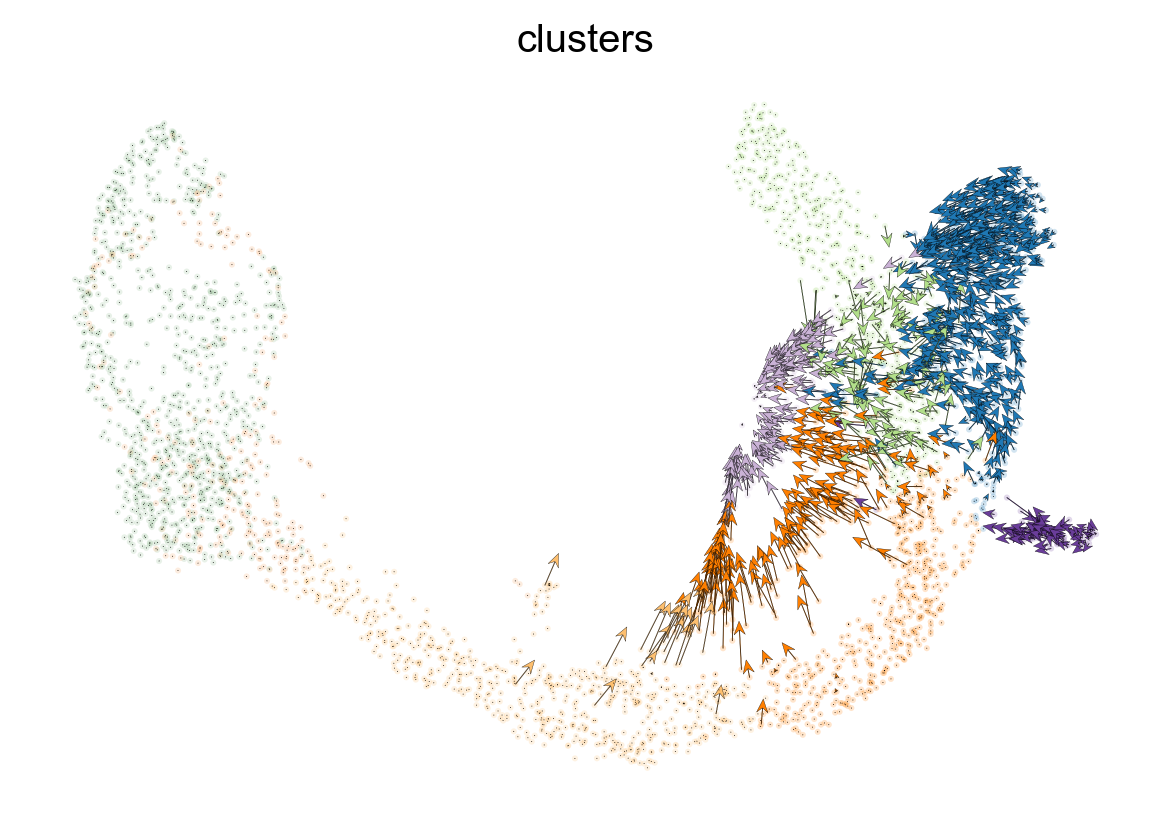

In [21]:
mc.acc_embedding(adata, basis = 'umap', arrow_length=3, arrow_size=2, dpi=120)

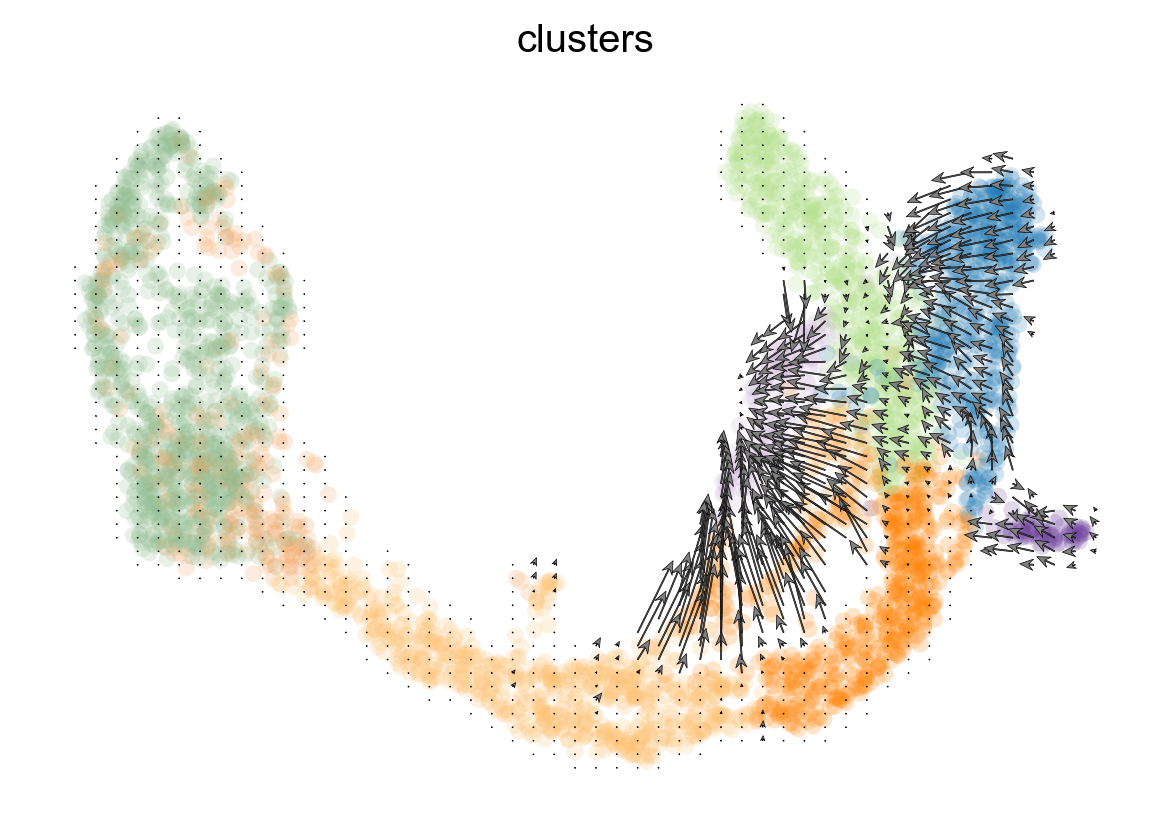

In [22]:
mc.acc_embedding_grid(adata, basis = 'umap', arrow_length=3, arrow_size=2, dpi=120)

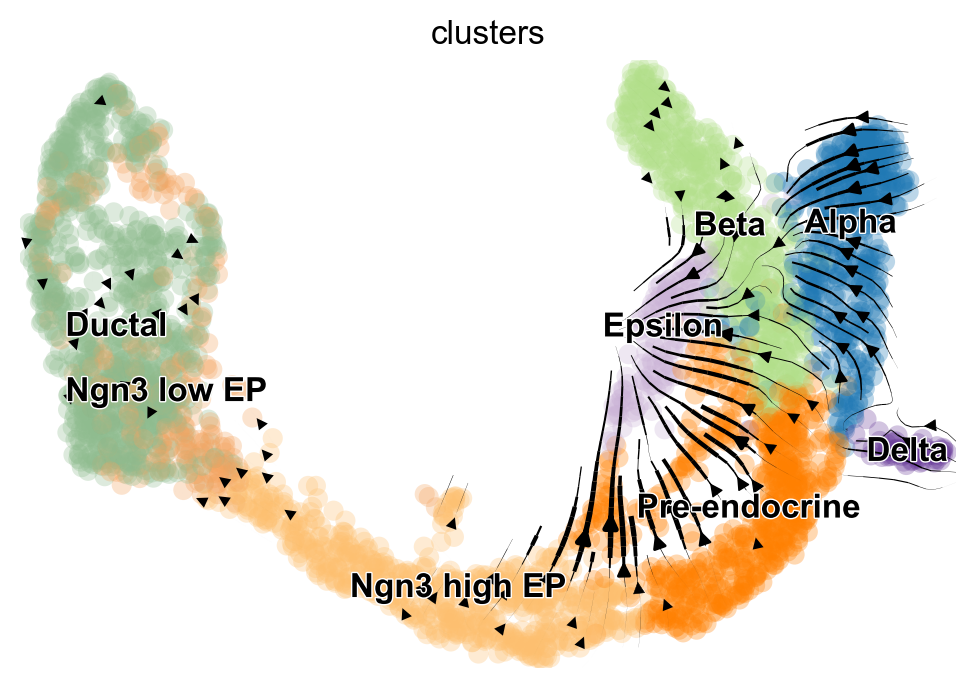

In [23]:
mc.acc_embedding_stream(adata)

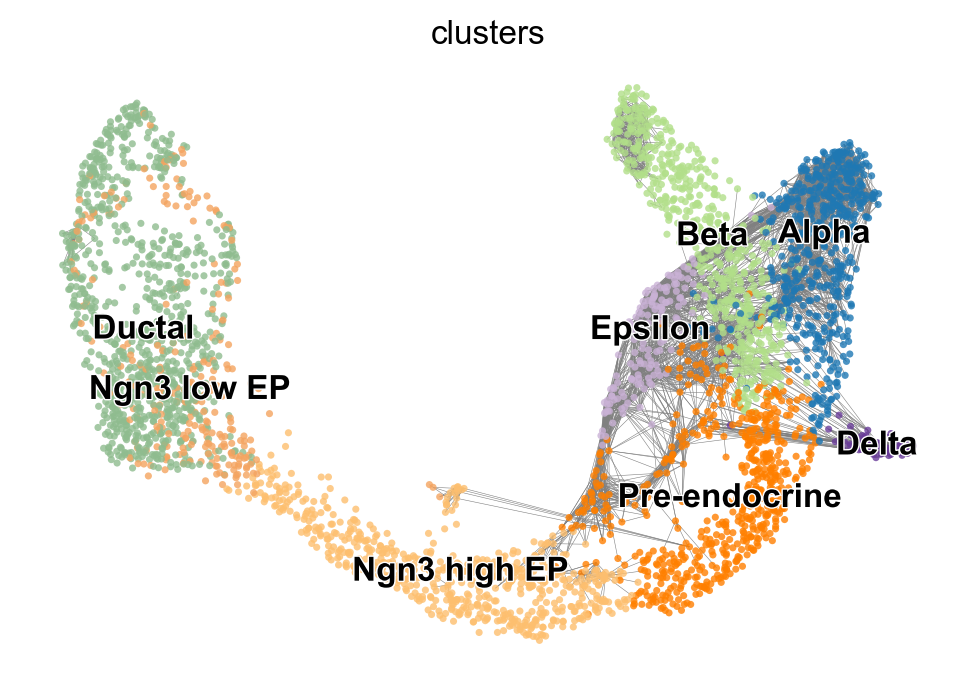

In [24]:
mc.acc_graph(adata)

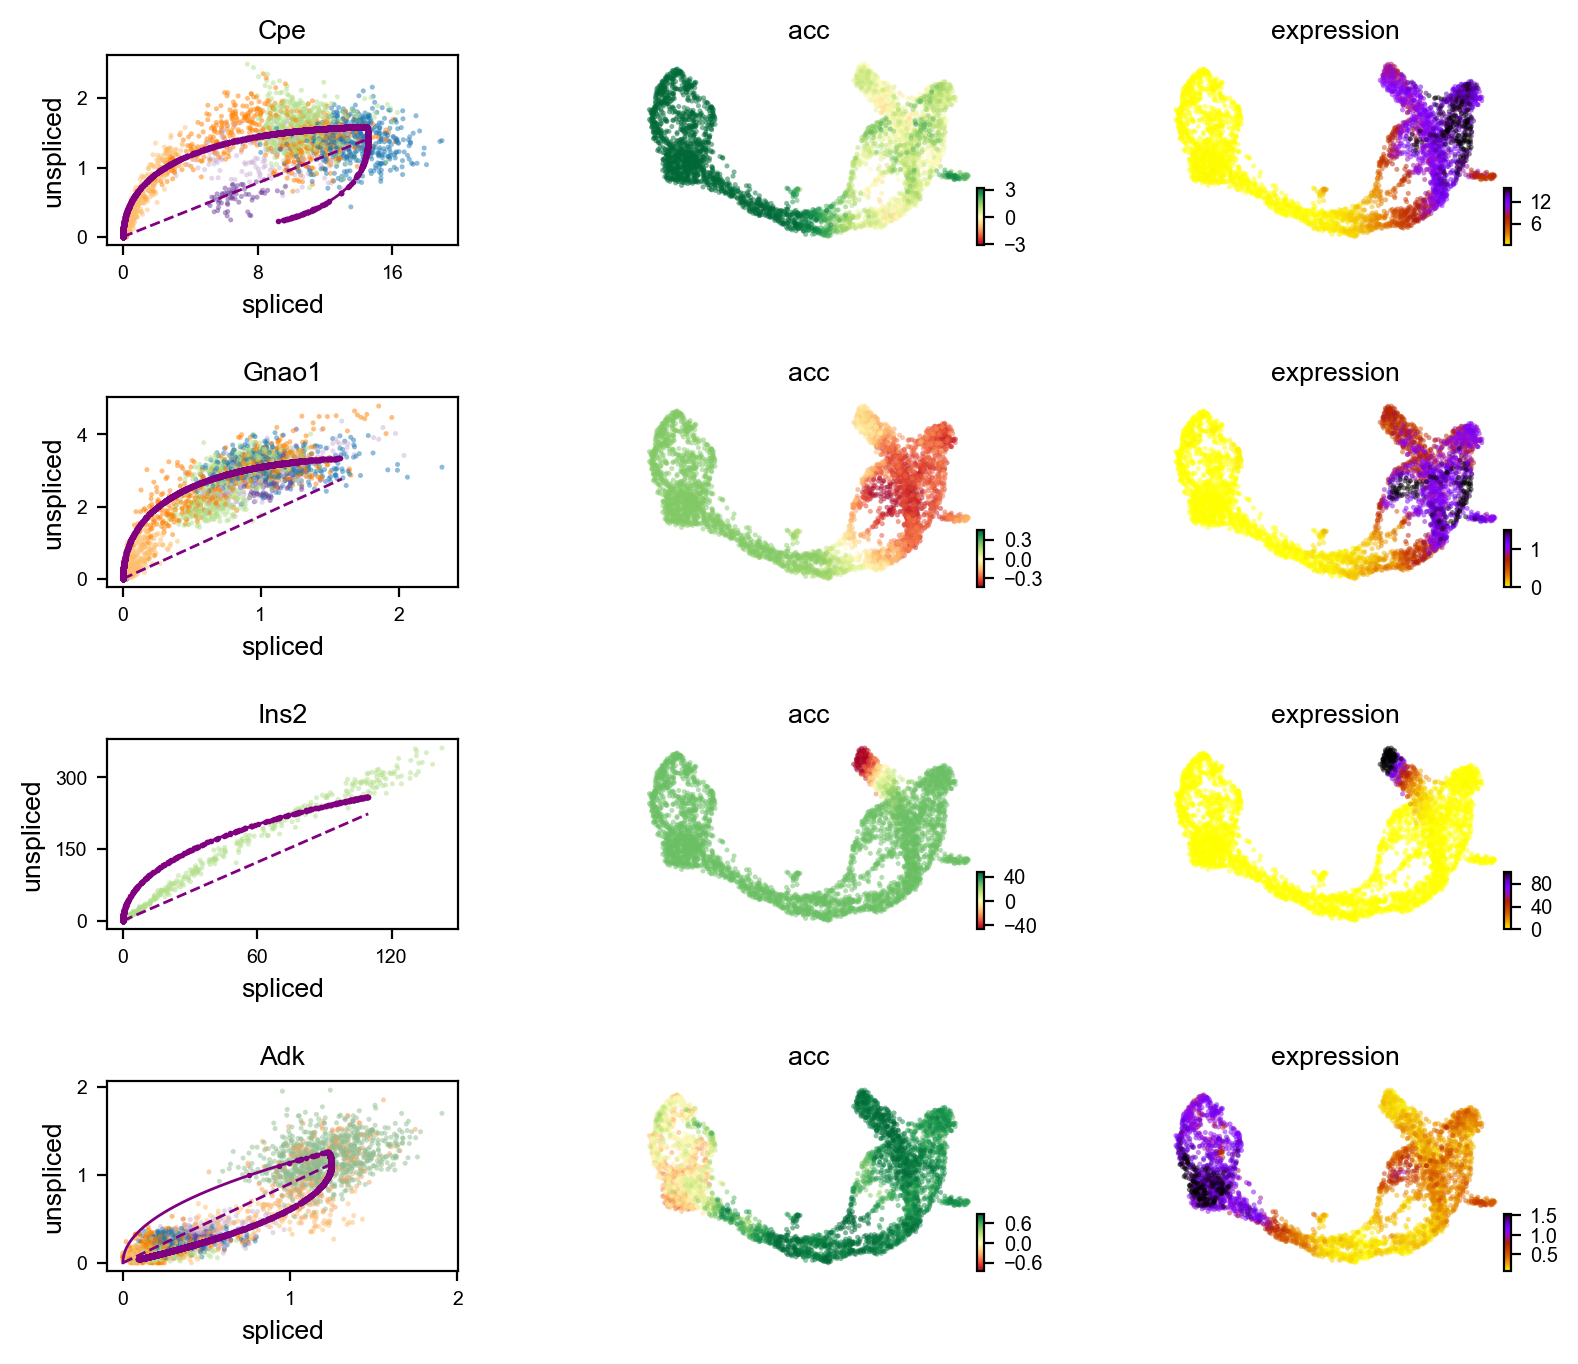

In [25]:
mc.acc(adata, ['Cpe', 'Gnao1', 'Ins2', 'Adk'])

In [26]:
adata.uns['neighbors']['distances'] = adata.obsp['distances']
adata.uns['neighbors']['connectivities'] = adata.obsp['connectivities']

In [27]:
mt.paga(adata, groups='clusters')
df = scv.get_df(adata, 'paga/transitions_confidence', precision=2).T
df.style.background_gradient(cmap='Blues').format('{:.2g}')

computing terminal states
    identified 2 regions of root cells and 2 regions of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
running PAGA using priors: ['acc_pseudotime']
    finished (0:00:02) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', acc transitions (adata.uns)


C:\Users\Pradip\AppData\Roaming\Python\Python310\site-packages\networkx\convert.py:158: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `from_scipy_sparse_array` instead.
  return nx.from_scipy_sparse_matrix(data, create_using=create_using)


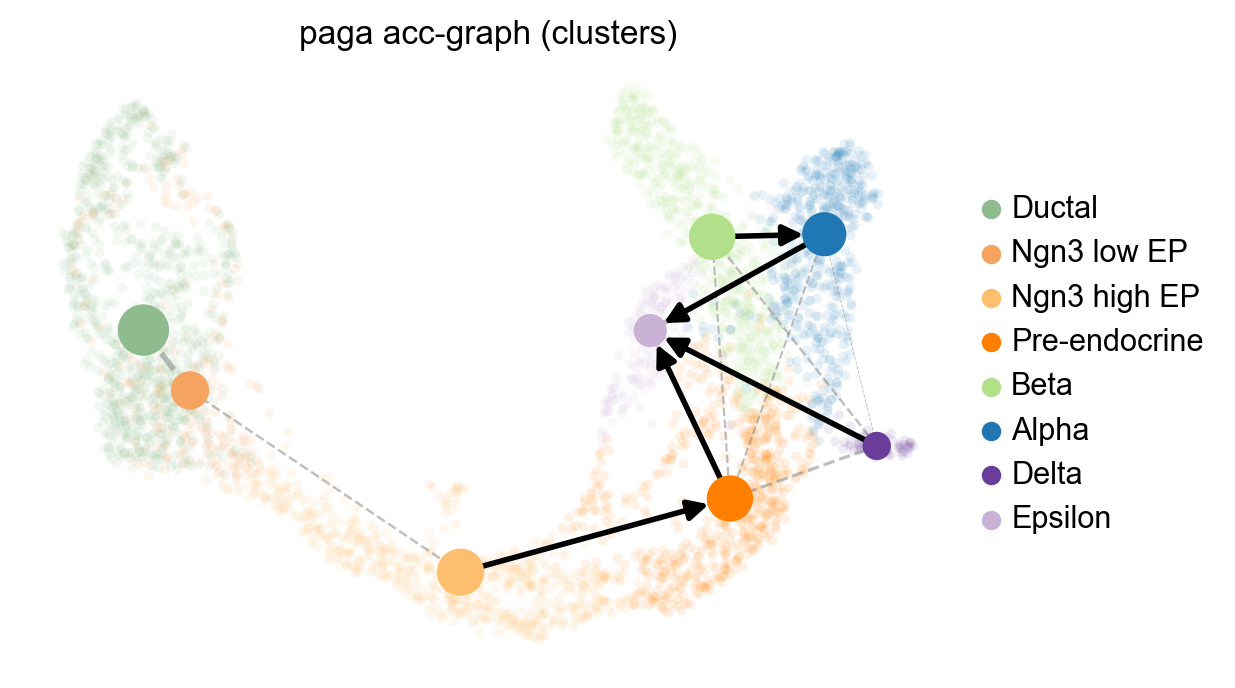

In [28]:
mc.paga(adata, basis='umap', size=50, alpha=.1,
            min_edge_width=2, node_size_scale=1.5)

--> added 'acc_length' (adata.obs)
--> added 'acc_confidence' (adata.obs)


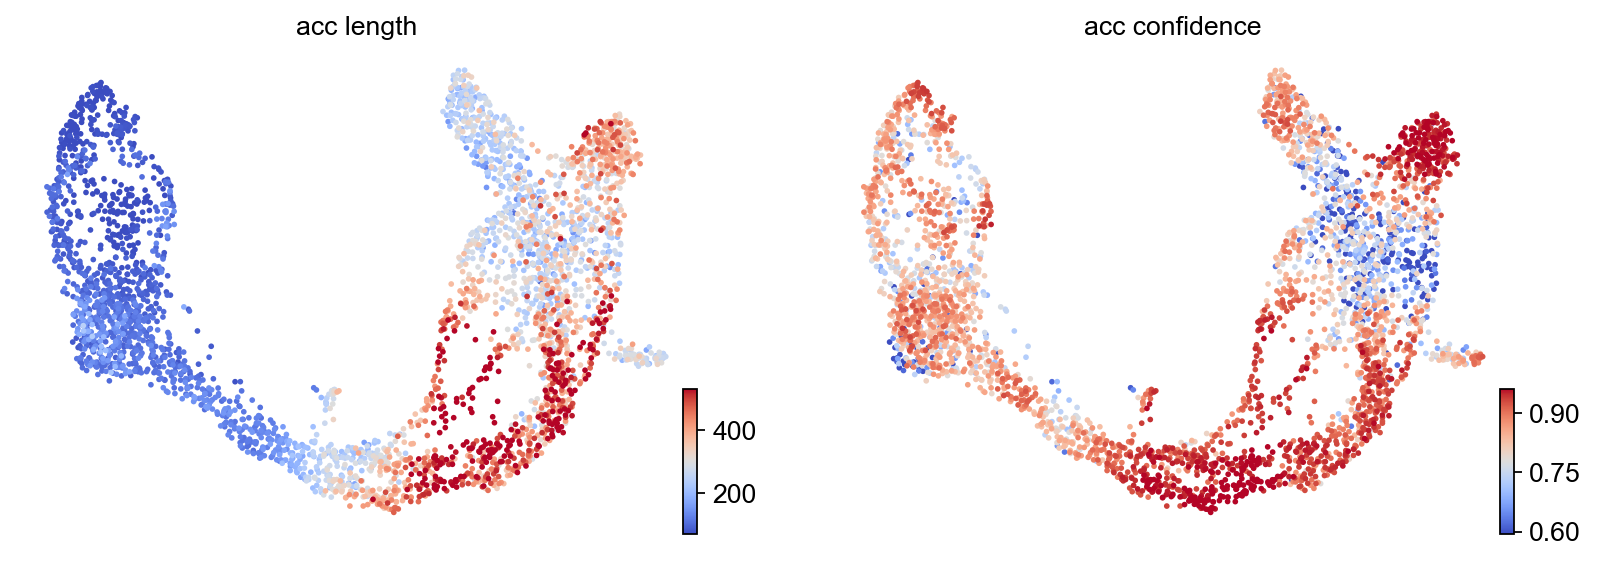

In [21]:
mt.acc_confidence(adata)
keys = 'acc_length', 'acc_confidence'
mc.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95])